In [9]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [10]:
dir_path='prepared_dataset'

#training dataset
x_train=np.load(os.path.join(dir_path,'train_images.npy'))
y_train=np.load(os.path.join(dir_path,'train_labels.npy'))

#cross validation dataset
x_cv=np.load(os.path.join(dir_path,'cross_validation_images.npy'))
y_cv=np.load(os.path.join(dir_path,'cross_validation_labels.npy'))

#test dataset
x_test=np.load(os.path.join(dir_path,'test_images.npy'))
y_test=np.load(os.path.join(dir_path,'test_labels.npy'))

y_train=np.expand_dims(y_train,axis=1)
y_cv=np.expand_dims(y_cv,axis=1)
y_test=np.expand_dims(y_test,axis=1)

features=278*278*3

x_train_reshaped=x_train.reshape((445,features))
x_cv_reshaped=x_cv.reshape((56,features))
x_test_reshaped=x_test.reshape((56,features))

print("After reshaping : ")
print(f"shape of X_train,y_train = {x_train_reshaped.shape},{y_train.shape} \n"+
      f"shape of X_cv,y_cv = {x_cv_reshaped.shape},{y_cv.shape} \n"+
      f"shape of X_test,y_test = {x_test_reshaped.shape},{y_test.shape}")

After reshaping : 
shape of X_train,y_train = (445, 231852),(445, 1) 
shape of X_cv,y_cv = (56, 231852),(56, 1) 
shape of X_test,y_test = (56, 231852),(56, 1)


In [11]:
scaler=StandardScaler()
x_train_reshaped_scaled=scaler.fit_transform(x_train_reshaped)
x_cv_reshaped_scaled=scaler.transform(x_cv_reshaped)

In [12]:
model = Sequential([
        tf.keras.Input((231852,)),
        Dense(units=940, activation='relu'),
        Dense(units=360,activation='relu'),
        Dense(units=160,activation='relu'),
        Dense(units=80,activation='relu'),
        Dense(units=20,activation='relu'),
        Dense(units=2, activation='linear')
    ], name='model')

In [13]:
# model.load_weights('model_weights.h5')

model.compile(optimizer=Adam(0.01),loss=SparseCategoricalCrossentropy(from_logits=True))

history=model.fit(x_train_reshaped_scaled,y_train,epochs=100)

Epoch 1/100
14/14 [==============================] - 31s 2s/step - loss: 1146.7880
Epoch 2/100
14/14 [==============================] - 28s 2s/step - loss: 191.6538
Epoch 3/100
14/14 [==============================] - 28s 2s/step - loss: 36.6689
Epoch 4/100
14/14 [==============================] - 28s 2s/step - loss: 5.7125
Epoch 5/100
14/14 [==============================] - 28s 2s/step - loss: 2.0829
Epoch 6/100
14/14 [==============================] - 28s 2s/step - loss: 2.0621
Epoch 7/100
14/14 [==============================] - 29s 2s/step - loss: 1.3981
Epoch 8/100
14/14 [==============================] - 30s 2s/step - loss: 0.9466
Epoch 9/100
14/14 [==============================] - 30s 2s/step - loss: 1.1661
Epoch 10/100
14/14 [==============================] - 30s 2s/step - loss: 0.7948
Epoch 11/100
14/14 [==============================] - 30s 2s/step - loss: 0.6925
Epoch 12/100
14/14 [==============================] - 30s 2s/step - loss: 0.7838
Epoch 13/100
14/14 [===========

In [14]:
logits_train = model.predict(x_train_reshaped_scaled)

yhat_train = tf.nn.softmax(logits_train, axis=1).numpy()
prob_train = np.argmax(yhat_train, axis=1)
J_train = np.mean(prob_train != y_train)
# J_cv
logits_cv = model.predict(x_cv_reshaped_scaled)
yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
prob_cv = np.argmax(yhat_cv, axis=1)
J_cv = np.mean(prob_cv != y_cv)


print("RESULTS ======>")
print(f"J_train = {J_train}  " +
          f"J_cv = {J_cv}  ")

2/2 [==============================] - 0s 161ms/step
RESULTS ======>
J_train = 0.5027244034844085  J_cv = 0.4961734693877551  


2/2 [==============================] - 0s 163ms/step


<Axes: >

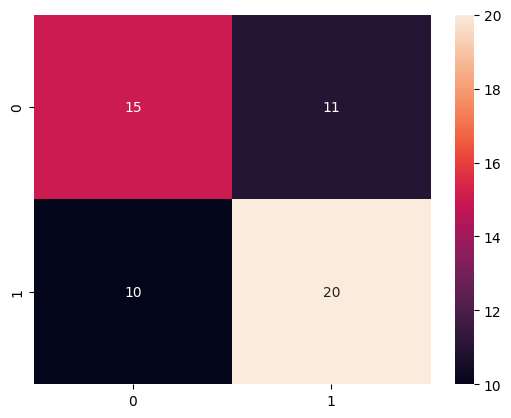

In [15]:

logits_cv = model.predict(x_cv_reshaped_scaled)
yhat_cv = tf.nn.softmax(logits_cv, axis=1).numpy()
prob_cv = np.argmax(yhat_cv, axis=1)
J_cv = np.mean(prob_cv != y_cv)
sns.heatmap(confusion_matrix(y_cv,prob_cv),annot=True)

2/2 [==============================] - 0s 161ms/step
0.4846938775510204


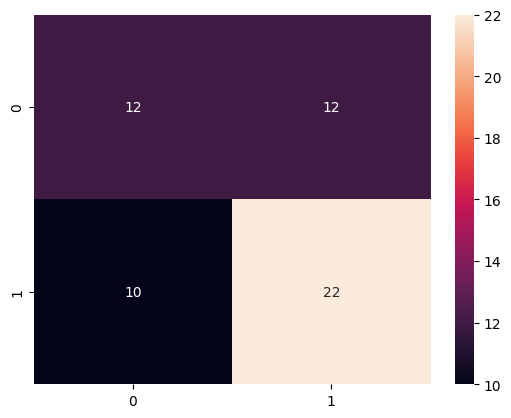

In [16]:
x_test_reshaped_scaled=scaler.transform(x_test_reshaped)
logits_test = model.predict(x_test_reshaped_scaled)
yhat_test = tf.nn.softmax(logits_test, axis=1).numpy()
prob_test = np.argmax(yhat_test, axis=1)
J_test = np.mean(prob_test != y_test)
sns.heatmap(confusion_matrix(y_test,prob_test),annot=True)

print(J_test)